# ***Loan Approval Prediction using ML Algorithms and their performance comparison***
---


In [0]:
#imported all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import metrics

In [4]:
df_train=pd.read_csv('https://raw.githubusercontent.com/Yogita98/Loan-Status-Classification/master/train_AV3.csv?token=AI66AL4HZBEKUVFEMHB2PBK6WVXZO')
df_test=pd.read_csv('https://raw.githubusercontent.com/Yogita98/Loan-Status-Classification/master/test_AV3.csv?token=AI66AL6IBRBDU2CGVIDOXT26WVXV2')
df_train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


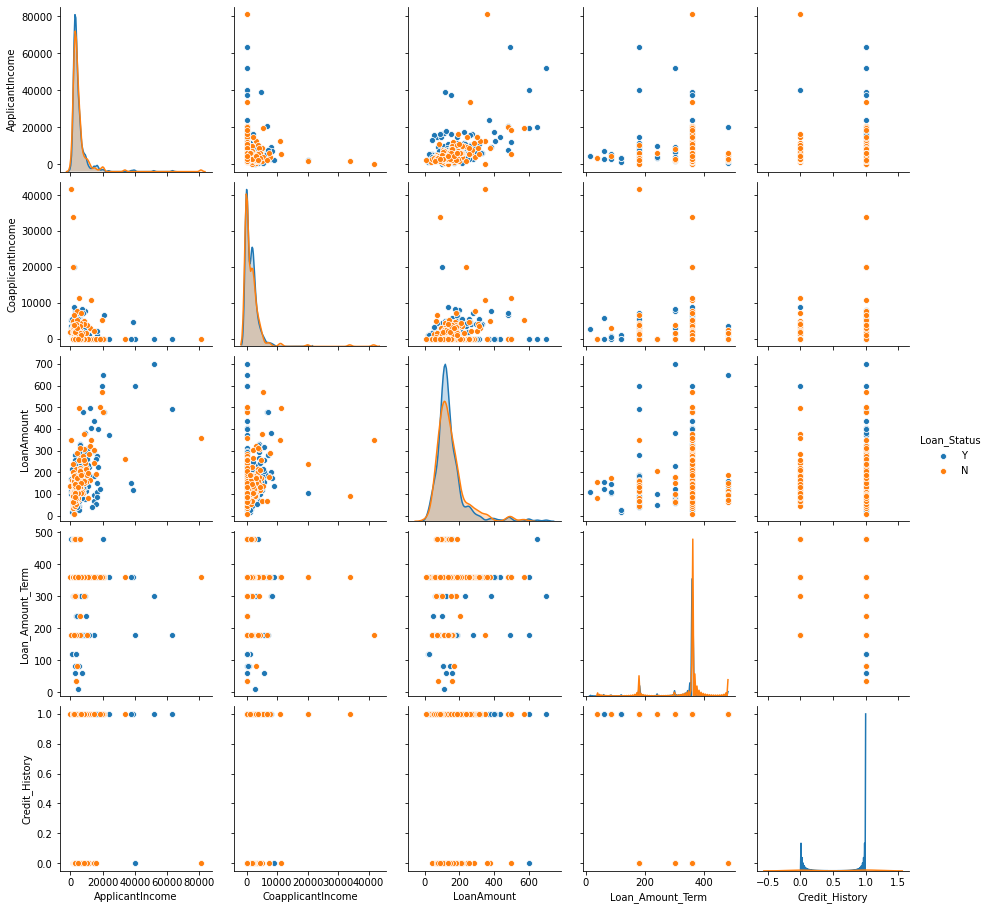

In [9]:
sns.pairplot(df_train,hue='Loan_Status')

### **Encoding the dataset with the help of Label Encoder**

In [10]:
df_train_replace=df_train.select_dtypes(include=['object']).copy()
df_test_replace=df_test.select_dtypes(include=['object']).copy()
df_train_replace.drop(columns=['Loan_ID'],inplace=True)
df_test_replace.drop(columns=['Loan_ID'],inplace=True)
df_test_replace.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         356 non-null    object
 1   Married        367 non-null    object
 2   Dependents     357 non-null    object
 3   Education      367 non-null    object
 4   Self_Employed  344 non-null    object
 5   Property_Area  367 non-null    object
 6   Loan_Status    367 non-null    object
dtypes: object(7)
memory usage: 20.2+ KB


In [0]:
#Filled the empty cells with string 'z'
df_train_replace.replace(r'^\s*$','z',regex=True,inplace=True)
df_test_replace.replace(r'^\s*$','z',regex=True,inplace=True)


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df1 = df_train_replace.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
print(df1.head(5))
df2 = df_test_replace.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
print(df2.head(5))


   Gender  Married  Dependents  ...  Self_Employed  Property_Area  Loan_Status
0       1        0           0  ...              0              2            1
1       1        1           1  ...              0              0            0
2       1        1           0  ...              1              2            1
3       1        1           0  ...              0              2            1
4       1        0           0  ...              0              2            1

[5 rows x 7 columns]
   Gender  Married  Dependents  ...  Self_Employed  Property_Area  Loan_Status
0       1        1           0  ...              0              2            1
1       1        1           1  ...              0              2            1
2       1        1           2  ...              0              2            1
3       1        1           2  ...              0              2            1
4       1        0           0  ...              0              2            1

[5 rows x 7 columns]


In [13]:
df_train = df_train.assign(Gender=df1['Gender'],Married=df1['Married'],Education=df1['Education'],
                           Self_Employed=df1['Self_Employed'],Property_Area=df1['Property_Area'],
                           Dependents=df1['Dependents'],Loan_Status=df1['Loan_Status'])
df_test = df_test.assign(Gender=df2['Gender'],Married=df2['Married'],Education=df2['Education'],
                           Self_Employed=df2['Self_Employed'],Property_Area=df2['Property_Area'],
                           Dependents=df2['Dependents'],Loan_Status=df2['Loan_Status'])
print(df_train.head(20))
df_test.head(20)

     Loan_ID  Gender  Married  ...  Credit_History  Property_Area  Loan_Status
0   LP001002       1        0  ...             1.0              2            1
1   LP001003       1        1  ...             1.0              0            0
2   LP001005       1        1  ...             1.0              2            1
3   LP001006       1        1  ...             1.0              2            1
4   LP001008       1        0  ...             1.0              2            1
5   LP001011       1        1  ...             1.0              2            1
6   LP001013       1        1  ...             1.0              2            1
7   LP001014       1        1  ...             0.0              1            0
8   LP001018       1        1  ...             1.0              2            1
9   LP001020       1        1  ...             1.0              1            0
10  LP001024       1        1  ...             1.0              2            1
11  LP001027       1        1  ...             1.0  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,NaN,2,1
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,1
6,LP001055,0,0,1,1,0,2226,0,59.0,360.0,1.0,1,1
7,LP001056,1,1,2,1,0,3881,0,147.0,360.0,0.0,0,0
8,LP001059,1,1,2,0,2,13633,0,280.0,240.0,1.0,2,1
9,LP001067,1,0,0,1,0,2400,2400,123.0,360.0,1.0,1,1


In [14]:
print(df_train.isnull().sum())
df_test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

### **Handling the Missing Data with the help of KNN Imputer**

In [15]:
df_train_knn=df_train.iloc[:,8:11].copy()
df_test_knn=df_test.iloc[:,8:11].copy()
print(df_test_knn.head(5))
df_train_knn.head(5)


   LoanAmount  Loan_Amount_Term  Credit_History
0       110.0             360.0             1.0
1       126.0             360.0             1.0
2       208.0             360.0             1.0
3       100.0             360.0             NaN
4        78.0             360.0             1.0


,LoanAmount,Loan_Amount_Term,Credit_History
0,NaN,360.0,1.0
1,128.0,360.0,1.0
2,66.0,360.0,1.0
3,120.0,360.0,1.0
4,141.0,360.0,1.0


In [16]:
imputer = KNNImputer(n_neighbors=5)
arr1=imputer.fit_transform(df_train_knn)
arr2=imputer.fit_transform(df_test_knn)
df_train_knn = pd.DataFrame.from_records(arr1,columns=['LoanAmount','Loan_Amount_Term','Credit_History'])
df_test_knn = pd.DataFrame.from_records(arr2,columns=['LoanAmount','Loan_Amount_Term','Credit_History'])
# print(df_train_knn_imputation.head(30))
df_train_knn.isnull().sum()

LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
dtype: int64

In [17]:
df_train=df_train.assign(LoanAmount=df_train_knn['LoanAmount'],Loan_Amount_Term=df_train_knn['Loan_Amount_Term'],Credit_History=df_train_knn['Credit_History'])
df_test=df_test.assign(LoanAmount=df_test_knn['LoanAmount'],Loan_Amount_Term=df_test_knn['Loan_Amount_Term'],Credit_History=df_test_knn['Credit_History'])
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
df_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.138457,-0.068678,0.002307,-0.030903,0.008690
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.143059,-0.096887,0.000580,0.007973,0.096657
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.127116,-0.074655,-0.072424,0.032600,-0.007318
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.168439,-0.076594,-0.089908,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.087111,-0.037633,0.071095,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.564924,-0.044511,-0.009456,-0.009500,-0.004710
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.188074,-0.062030,0.004790,0.010522,-0.059187
LoanAmount,0.138457,0.143059,0.127116,-0.168439,0.087111,0.564924,0.188074,1.000000,0.041683,0.011363,-0.045651,-0.032147
Loan_Amount_Term,-0.068678,-0.096887,-0.074655,-0.076594,-0.037633,-0.044511,-0.062030,0.041683,1.000000,0.010580,-0.075054,-0.024023
Credit_History,0.002307,0.000580,-0.072424,-0.089908,0.071095,-0.009456,0.004790,0.011363,0.010580,1.000000,0.000939,0.517012


In [20]:
print(df_train.head(5))
df_test.head()

    Loan_ID  Gender  Married  ...  Credit_History  Property_Area  Loan_Status
0  LP001002       1        0  ...             1.0              2            1
1  LP001003       1        1  ...             1.0              0            0
2  LP001005       1        1  ...             1.0              2            1
3  LP001006       1        1  ...             1.0              2            1
4  LP001008       1        0  ...             1.0              2            1

[5 rows x 13 columns]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1


### **Splitting the dataset in train and test data**

In [0]:
X_train=df_train.iloc[:,1:12]
Y_train=df_train.iloc[:,12:13]
X_test=df_test.iloc[:,1:12]
Y_test=df_test.iloc[:,12:13]

### **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()

In [23]:
model_LR.fit(X_train,Y_train.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
Y_predicted=model_LR.predict(X_test)


### **Performance Evaluation of Logistic Regression**

In [25]:
acc_LR=model_LR.score(X_test,Y_test)
print(acc_LR)

0.9945504087193461


In [26]:
mae_LR=metrics.mean_absolute_error(Y_test, Y_predicted)
mse_LR=metrics.mean_squared_error(Y_test, Y_predicted) 
print(mae_LR,mse_LR)

0.005449591280653951 0.005449591280653951


In [27]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test,Y_predicted))
print(classification_report(Y_test,Y_predicted))

[[ 57   1]
 [  1 308]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       1.00      1.00      1.00       309

    accuracy                           0.99       367
   macro avg       0.99      0.99      0.99       367
weighted avg       0.99      0.99      0.99       367



### **Support Vector Machine**

In [0]:
from sklearn.svm import SVC
model_SVC = SVC(kernel='linear')

In [29]:
model_SVC.fit(X_train,Y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### **Performance Evaluation of Support Vector Classifier**

In [30]:
model_SVC.score(X_test,Y_test.values.ravel())

0.9863760217983651

In [0]:
Y_predicted=model_SVC.predict(X_test)

In [32]:
acc_SVC=model_SVC.score(X_test,Y_test.values.ravel())
print(acc_SVC)

0.9863760217983651


In [33]:
mae_SVC=metrics.mean_absolute_error(Y_test, Y_predicted)
mse_SVC=metrics.mean_squared_error(Y_test, Y_predicted)
print(mae_SVC,mse_SVC) 

0.013623978201634877 0.013623978201634877


### **Decision Tree**

In [0]:
from sklearn import tree
model_DT = tree.DecisionTreeClassifier(max_depth=10)

In [35]:
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
Y_predicted=model_DT.predict(X_test)

### **Performance Evaluation of D-Tree Classifier**

In [37]:
acc_DT=model_DT.score(X_test,Y_test)
print(acc_DT)

0.888283378746594


In [0]:
mae_DT=metrics.mean_absolute_error(Y_test,Y_predicted)
mse_DT=metrics.mean_squared_error(Y_test,Y_predicted)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test,Y_predicted))
print(classification_report(Y_test,Y_predicted))

[[ 57   1]
 [ 40 269]]
              precision    recall  f1-score   support

           0       0.59      0.98      0.74        58
           1       1.00      0.87      0.93       309

    accuracy                           0.89       367
   macro avg       0.79      0.93      0.83       367
weighted avg       0.93      0.89      0.90       367



### **K Nearest Neighbors**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()

### **Determining the k-value with the help of cross validation**

In [0]:
accuracy_rate = []
error_rate=[]

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,Y_train,cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

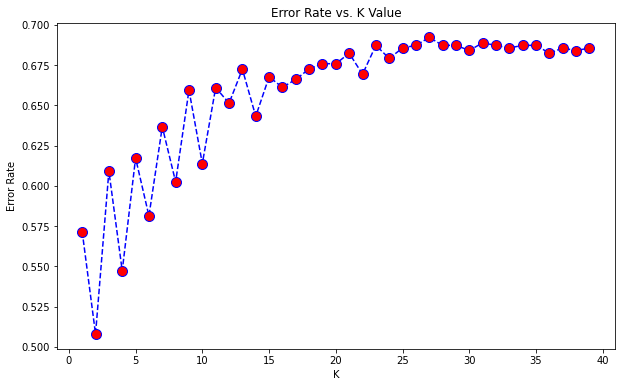

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
model_KNN = KNeighborsClassifier(n_neighbors=25)

In [0]:
model_KNN.fit(X_train,Y_train.values.ravel())
Y_predicted=model_KNN.predict(X_test)

### **Performance Evaluation of kNN**

In [45]:
acc_kNN=model_KNN.score(X_test,Y_test)
print(acc_kNN)

0.8201634877384196


In [46]:
mae_kNN=metrics.mean_absolute_error(Y_test,Y_predicted)
mse_kNN=metrics.mean_squared_error(Y_test,Y_predicted)
print(mae_kNN,mse_kNN)

0.17983651226158037 0.17983651226158037


In [47]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_test,Y_predicted))
print(classification_report(Y_test,Y_predicted))

[[  4  54]
 [ 12 297]]
              precision    recall  f1-score   support

           0       0.25      0.07      0.11        58
           1       0.85      0.96      0.90       309

    accuracy                           0.82       367
   macro avg       0.55      0.52      0.50       367
weighted avg       0.75      0.82      0.77       367



### **Comparision of all the models**

In [48]:
models_comparison=pd.DataFrame(
    {
        'Model': ['Logistic Regression','Support Vector Machine','Decision Tree','k Nearest Neighbors'],
        'Score': [acc_LR,acc_SVC,acc_DT,acc_kNN],
        'Mean Absolute Error':[mae_LR,mae_SVC,mae_DT,mae_kNN],
        'Mean Squared Error': [mse_LR,mse_SVC,mse_DT,mse_kNN]      
     
    }
)
models_comparison

,Model,Score,Mean Absolute Error,Mean Squared Error
0,Logistic Regression,0.994550,0.005450,0.005450
1,Support Vector Machine,0.986376,0.013624,0.013624
2,Decision Tree,0.888283,0.111717,0.111717
3,k Nearest Neighbors,0.820163,0.179837,0.179837
